## 逻辑回归 多类别

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import math

读取数据

In [2]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
data = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
X = data.train.images[:500]
y = data.train.labels[:500]

数据展示

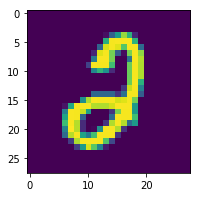

In [4]:
plt.figure(figsize=(3,3))
plt.imshow(X[104].reshape([28,28]))
plt.show()

In [5]:
class LogisticRegression():
    def __init__(self, n_iter=1000, alpha=0.01):
        self.n_iter = n_iter
        self.alpha = alpha
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):
        if len(y.shape) == 1:
            self.w = np.zeros(x.shape[1])
            self.b = np.zeros(1)
            
        else:                               
            self.w = np.zeros([x.shape[1], y.shape[1]])
            self.b = np.zeros([1, y.shape[1]])
                     
        m = x.shape[0]
        self.costs = []
        for i in range(self.n_iter):
            z = np.dot(x, self.w) + self.b
            a = self.sigmoid(z)
            
            dw = 1 / m * np.dot(x.T, a-y)
            db = 1 / m * np.sum(a-y, axis=0)
            
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
            
            cost = -1/m * np.sum(y*np.log(a) + (1-y)*np.log(1-a), axis=0)
            self.costs.append(cost)
    
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        if len(z.shape) ==1:
            y_ = (z > 0).astype(int)
            return y_
        
        else:            
            a = self.sigmoid(z)       
            a_max = np.argmax(a, axis=1)
            y_ = np.zeros_like(z)
            index_offset = np.arange(z.shape[0]) * z.shape[1]
            y_.flat[index_offset + a_max] = 1
            return y_

In [6]:
log = LogisticRegression()
log.fit(X, y)

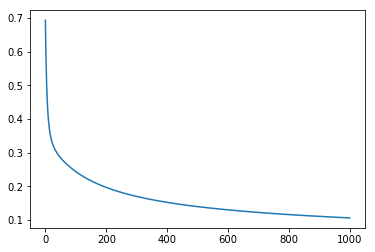

In [7]:
costs = np.mean(log.costs, axis=1)
plt.plot(costs)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y, log.predict(X))
print('training accuracy:',accuracy_train)

accuracy_test = accuracy_score(data.test.labels, log.predict(data.test.images))
print('testing accuracy:',accuracy_test)

training accuracy: 0.922
testing accuracy: 0.8285


9


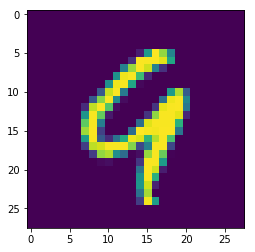

In [9]:
i = 185
x = data.test.images[i]
print(np.argmax(log.predict(x)))
plt.imshow(x.reshape([28,28]))